## Neural Network to classify MNIST dataset

### Steps to Build a Neural Network

1. **Import necessary libraries and load the dataset.**
2. **Preprocess the data.**
3. **Build the neural network model.**
4. **Compile the model.**
5. **Train the model.**
6. **Evaluate the model.**


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

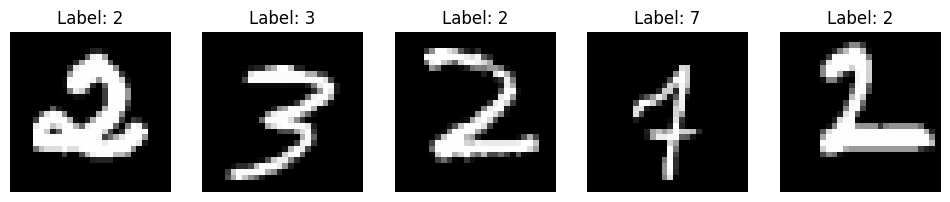

In [8]:
# Step 1: Load the MNIST dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plotting images from our dataset
num_images = 5

random_indices = np.random.randint(0, len(x_train), num_images)

plt.figure(figsize=(12, 4))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')

plt.show()

In [ ]:
# Step 2: Preprocess the data

x_train = x_train / 255.0 
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Step 3: Build the neural network model

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 input images
model.add(Dense(128, activation='relu'))   # Hidden layer with 128 units and ReLU activation
model.add(Dense(64, activation='relu'))    # Hidden layer with 64 units and ReLU activation
model.add(Dense(10, activation='softmax')) # Output layer with 10 units (for 10 classes) and softmax activation

In [ ]:
# Step 4: Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 5: Train the model
batch_size = 32
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [ ]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')